# Gravitational Interactions: Numerical Simulation of Planetary Orbits

## Zain Fox-Latif | 21018444

This assignment explores the gravitational interactions between two planets in two situations. Firstly, a situation where planet 2 is fixed is considered. The assignment then shifts to model a situation where planets 1 and 2 both orbit their common centre of mass, where the velocity Verlet integrator is used to achieve an overall better result.

In the first section, Newton's law of gravitation

$$\begin{equation} \mathbf{F}_1=\ \frac{Gm_1m_2}{{r_{12}}^3}\mathbf{r}_{12} \end{equation}$$
is used to calculate the force on an object with mass $m_1$ from another object of mass $m_2$, where $\mathbf{r}_{12} = \mathbf{r}_{2} - \mathbf{r}_{1}$ and $r_{12} = |\mathbf{r_{12}}|$. 



In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on a mass m1 at position r1
    from a mass m2 at position r2
    
    Inputs
    r1        Position of the first mass
    r2        Position of the second mass
    m1        First mass
    m2        Second mass

    Returns
    f_on_m1   Force on m1 as a result of m2    
    """
    # Find r_12 and its magnitude|
    r_12 = r2 - r1
    f_on_m1 = (G * m1 * m2)/(np.sqrt(r_12[0]**2 + r_12[1]**2))**3 * r_12
    return f_on_m1

## Simple tests: Euler

In order to model the change of the system in a simple manner, the Euler method was used. For change in position and velocity respectively, 

$$ \begin{equation}
r(t+ \mathrm{dt}) = r(t) \frac{\mathrm{d}r}{\mathrm{dt}} \mathrm{dt}
\end{equation} 
$$

$$ \begin{equation}
v(t+ \mathrm{dt}) = v(t) \frac{\mathrm{d}v}{\mathrm{dt}} \mathrm{dt}.
\end{equation}
$$

It is worth noting in this case that $\frac{\mathrm{d}r}{\mathrm{dt}} = v$, and $\frac{\mathrm{d}v}{\mathrm{dt}} = a = \frac{F}{m}$. This simulation assumed that planet 2 was fixed at the origin, whereas planet 1 was free to move and was placed in a circular orbit. Kinetic and potential energies were calculated with

$$ \begin{equation}
T = \frac{1}{2}mv^2
\end{equation} $$

and 

$$ \begin{equation}
V = \frac{-GMm}{r}.
\end{equation} $$

Finally, to calculate the angular momentum, the formula 
$$
\begin{equation}
L = m(r \times v)
\end{equation}
$$

was used. The starting velocity of planet 2 was determined by equating Newton's law of gravitation with the formula for centripetal force $ F = mv^2/r $, yielding

$$
v = \sqrt{\frac{GM}{r}}.
$$

In [154]:
# Setting up parameters
Ndim = 2     #2D problem for now
Nsteps = 10000
dt = 0.001
G = 1        # Appropriate units
m1 = 0.0001  # Small
m2 = 1.0     # Large
r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))

# Setting up storage for energies
T = np.zeros((Nsteps))
V = np.zeros((Nsteps))
L = np.zeros((Nsteps))

# Initial conditions
r1[0] = np.array((1.0, 0))
v1[0] = np.array((0, np.sqrt(G*m2) ))
T[0] = 0.5 * m1 * np.sqrt(G*m2)
V[0] = -G * m1 * m2
L[0] = m1*np.cross(r1[0], v1[0])

In [155]:
%time
for i in range(Nsteps-1): # We calculate r, v at i+1
    f1 = force(r1[i], r2[i], m1, m2)
    # v1 at next step = v1 at this step + dt * dv/dt
    v1[i+1] = v1[i] + dt * f1/m1
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1] = r1[i] + dt * v1[i]

    # Calculating energies and angular momentum
    T[i+1] = 1/2 * m1 * np.linalg.norm(v1[i+1])**2
    V[i+1] = (-G * m1 * m2) / (np.linalg.norm(r2[i+1]-r1[i+1]))
    L[i+1] = m1*np.cross(r1[i+1], v1[i+1])

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 7.15 µs


Text(0.5, 1.0, 'Angular momentum changes throughout orbit')

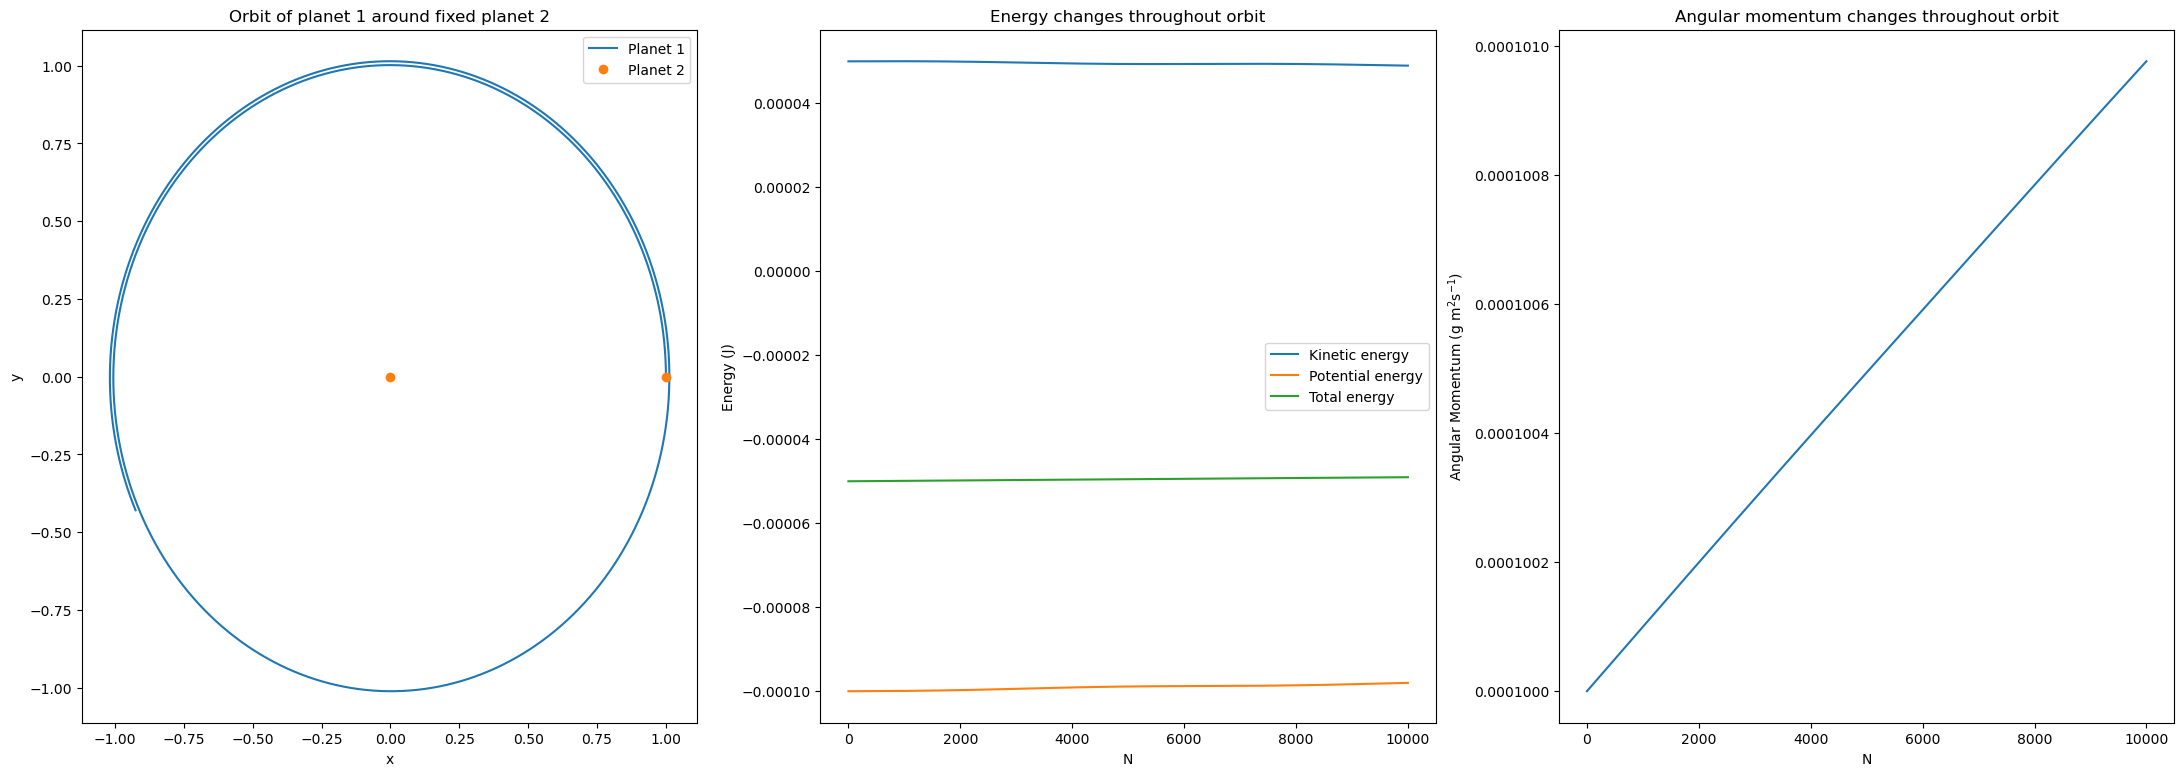

In [156]:
# Plotting results
fig = plt.figure(figsize=(27,9))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(r1[:,0],r1[:,1], label=r'Planet 1')
ax1.plot((0,0),'o', label=r'Planet 2')
ax1.set_title(r"Orbit of planet 1 around fixed planet 2")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()


ax2 = fig.add_subplot(1,3,2)
ax2.plot(T, label='Kinetic energy')
ax2.plot(V, label='Potential energy')
ax2.plot(V+T, label='Total energy')
ax2.set_title('Energy changes throughout orbit')
ax2.set_xlabel('N')
ax2.set_ylabel('Energy (J)')
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(L, label='Angular Momentum')
ax3.set_xlabel('N')
ax3.set_ylabel(r'Angular Momentum (g m$^2$s$^{-1}$)')
ax3.set_title('Angular momentum changes throughout orbit')



As is seen for the Euler method, the orbit for Planet 1 is not perfectly circular despite the attempts to simulate a circular orbit. This can be attributed to what some may consider an overly simple model, which also presents the problem of an increasing angular momentum which cannot be possible (angular momentum is conserved).

## More reliable: velocity Verlet

The velocity Verlet is a method considered to be more reliable than the previously used Euler method, and this will be investigated further in this section with a similar simulation. For a change in position and velocity,
$$
\begin{equation}
r(t + \mathrm{dt}) = r(t) + v(t)\mathrm{dt} + \mathrm{dt}^2 +\frac{F(t)}{2m}
\end{equation}
$$

$$
\begin{equation}
v(t + \mathrm{dt}) = v(t) + \mathrm{dt}\frac{F(t) + F(t + \mathrm{dt})}{2m}
\end{equation}
$$

To calculate the initial positions of the planets, the left hand side of the formula for centre of mass $\mathbf{r}_{CoM} =  (m_1\mathbf{r_1} + m_2\mathbf{r_2})/(m_1+m_2) $ was set to $0$ to enable the origin to act as the centre of mass. This yielded the relation

$$ m_1 \mathbf{r_1} = m_2 \mathbf{r_2}. $$ 

In arbitrarily choosing the point $r_1$ and adjusting the masses of the planets, the initial positions of the planets were calculated. For the initial velocity calculation, a similar calculation to the first part was performed, but this was adjusted to account for the orbit centering on the centre of mass of both planets. Selection of positions and velocities was again done to aim to produce a circular orbit (ensuring that the ratios of the mass and radii was the same to place fix the centre of mass).

In [157]:
Nsteps_v = 1000
dt_v = 0.01
m1_v = 1.0
m2_v = 10.0

# Storage for positions, velocities etc
r1_v = np.zeros((Nsteps_v, Ndim))
r2_v = np.zeros((Nsteps_v, Ndim))
v1_v = np.zeros((Nsteps_v, Ndim))
v2_v = np.zeros((Nsteps_v, Ndim))

# Initial conditions
r1_v[0] = np.array((1.0, 0))
r2_v[0] = np.array((-0.1, 0))

m_vtot = m1_v + m2_v
v1_v[0] = np.array((0, np.sqrt(G*m_vtot / np.abs(r1_v[0,0] - r2_v[0,0])))) * m2_v / m_vtot
v2_v[0] = np.array((0, -np.sqrt(G*m_vtot / np.abs(r1_v[0,0] - r2_v[0,0])))) * m1_v / m_vtot

# Storage for energies (T, V) and angular momenta
E1_v = np.zeros((Nsteps_v, 2))
E2_v = np.zeros((Nsteps_v, 2))

L1_v = np.zeros((Nsteps_v))
L2_v = np.zeros((Nsteps_v))

# Initial conditions for energy and angular momenta
E1_v[0] = np.array((0.5*m1_v*np.sqrt(v1_v[0,0]**2 + v1_v[0,1]**2), -G*m1_v*m2_v/np.abs(r1_v[0,0] - r2_v[0,0])))
E2_v[0] = np.array((0.5*m2_v*np.sqrt(v2_v[0,0]**2 + v2_v[0,1]**2), -G*m1_v*m2_v/np.abs(r1_v[0,0] - r2_v[0,0])))

L1_v[0] = np.cross(r1_v[0], v1_v[0])
L2_v[0] = 10*np.cross(r2_v[0], v2_v[0])

In [158]:
%time
for i in range(Nsteps_v -1):
    # Finding forces on masses at this timestep
    f1 = force(r1_v[i], r2_v[i], m1_v, m2_v)
    f2 = force(r2_v[i], r1_v[i], m2_v, m1_v)
    # Updating positions using velocity Verlet
    r1_v[i+1] = r1_v[i] + dt_v*v1_v[i] + (dt_v**2)*f1/(2*m1_v)
    r2_v[i+1] = r2_v[i] + dt_v*v2_v[i] + (dt_v**2)*f2/(2*m2_v)
    # Finding forces at new timestep 
    f1new = force(r1_v[i+1], r2_v[i+1], m1_v, m2_v)
    f2new = force(r2_v[i+1], r1_v[i+1], m2_v, m1_v)

    # Updating velocities using velocity Verlet
    v1_v[i+1] = v1_v[i] + dt_v*((f1+f1new) / (2*m1_v))
    v2_v[i+1] = v2_v[i] + dt_v*((f2+f2new) / (2*m2_v))

    
    # Storing energies and angular momenta
    E1_v[i+1] = np.array((0.5*m1_v*np.sqrt(v1_v[i+1,0]**2 + v1_v[i+1,1]**2), -G*m1_v*m2_v/np.linalg.norm(r2_v[i+1]-r1_v[i+1])))
    E2_v[i+1] = np.array((0.5*m2_v*np.sqrt(v2_v[i+1,0]**2 + v2_v[i+1,1]**2), -G*m2_v*m1_v/np.linalg.norm(r1_v[i+1]-r2_v[i+1])))

    L1_v[i+1] = np.cross(r1_v[i+1], v1_v[i+1])
    L2_v[i+1] = 10*np.cross(r2_v[i+1], v2_v[i+1])



CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.62 µs


Mean total energy:  -6.21480832828486
Mean total angular momentum:  3.1622776601683844


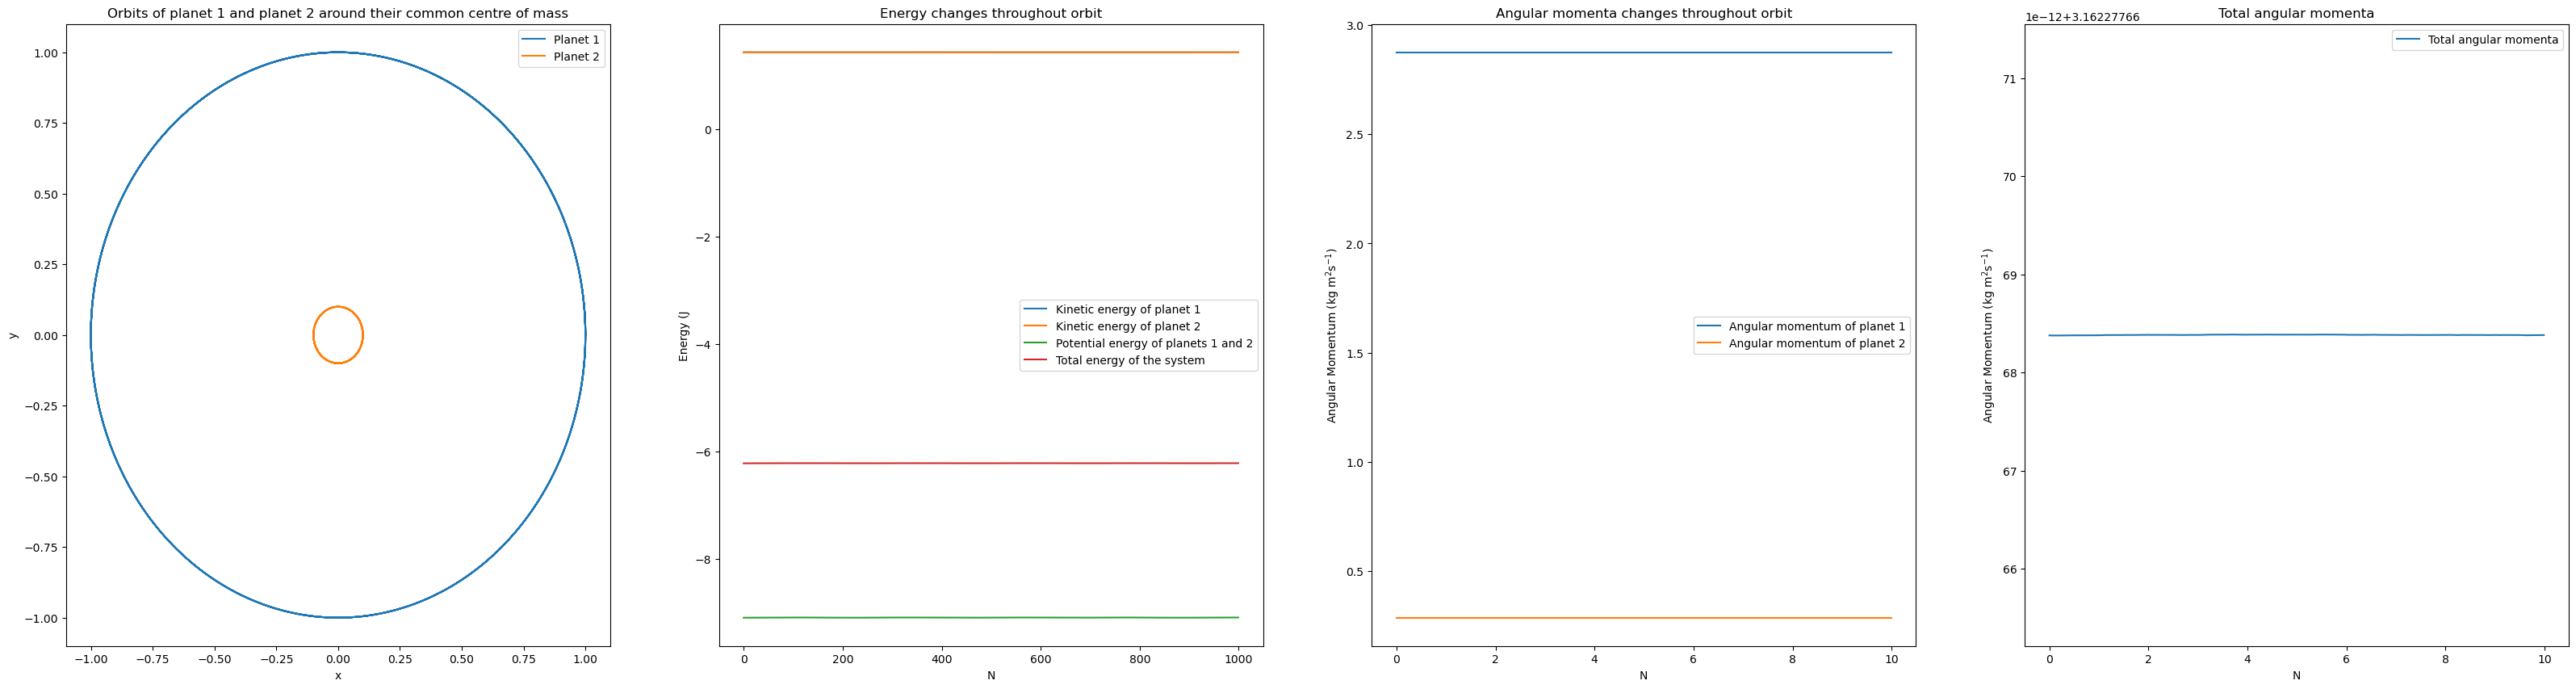

In [159]:
# Plot orbit, energies, angular momentum again

fig2 = plt.figure(figsize=(40,10))
ax4 = fig2.add_subplot(1,4,1)
ax4.plot(r1_v[:,0],r1_v[:,1], label=r'Planet 1')
ax4.plot(r2_v[:,0],r2_v[:,1], label=r'Planet 2')
ax4.set_title(r'Orbits of planet 1 and planet 2 around their common centre of mass')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend()


ax5 = fig2.add_subplot(1,4,2)
ax5.plot(E1_v[:,0], label=r'Kinetic energy of planet 1')
ax5.plot(E2_v[:,0], label=r'Kinetic energy of planet 2')
ax5.plot(E1_v[:,1], label=r'Potential energy of planets 1 and 2')
ax5.plot(E1_v[:,0] + E2_v[:,0] + E2_v[:,1],label=r'Total energy of the system')
ax5.set_title('Energy changes throughout orbit')
ax5.set_xlabel('N')
ax5.set_ylabel('Energy (J')
ax5.legend()

ax6 = fig2.add_subplot(1,4,3)
ax6.plot(np.arange(Nsteps_v)*dt_v, L1_v, label=r'Angular momentum of planet 1')
ax6.plot(np.arange(Nsteps_v)*dt_v, L2_v, label=r'Angular momentum of planet 2')
ax6.set_title('Angular momenta changes throughout orbit')
ax6.set_xlabel('N')
ax6.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax6.legend()

ax7 = fig2.add_subplot(1,4,4)
ax7.plot(np.arange(Nsteps_v)*dt_v, L1_v+L2_v, label=r'Total angular momenta')
ax7.set_title('Total angular momenta')
ax7.set_xlabel('N')
ax7.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax7.legend()

print('Mean total energy: ',np.mean(E1_v[:,0] + E2_v[:,0] + E2_v[:,1]))
print('Mean total angular momentum: ',np.mean(L1_v + L2_v))


